In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# K-means Clustering

## Exercise H8.1: K-means Clustering – batch version
Write a program that implements the batch version of K-means clustering and partitions the
given data set intoM clusters. Repeat the clustering procedure for different initializations of the
prototypes and M = 2; 3; 4; 5; 6; 7; 8. Include the following steps:

### A: Initialization

In [ ]:
def k_means_batch(M, X, t_max=5, scale=0.1):
    
    n, p = X.shape

    # w: M x n
    w = np.random.normal(loc=np.mean(X, axis=1), scale=scale, size=[M,n])
    
    # m: p x M
    m = np.zeros((p, M))
    
    # plotting
    ax = np.ones(t_max)
    fig, ax = plt.subplots(1, t_max, figsize=[15, 3])

    # error function
    E = np.zeros(t_max)

    for t in range(t_max):
        # plot location of prototype
        ax[t].plot(w[:,0], w[:,1], 'x', color='black', label='old prototypes')

        # loop over all p datapoints and assign all datapoints to their closest prototype.
        for a in range(p):
            m[a, :] = 0
            closest_q = np.argmin(np.linalg.norm(w - X[:, a], axis=1))
            m[a, closest_q] = 1
        
        # loop over all prototypes and recompute location 
        for q in range(M):
            # x_q: all points assigned to prototyp q
            x_q = X[:, m[:, q]==1]
            if x_q.shape != (2, 0):
                # set q to the center of its assigned data
                w[q] = np.mean(x_q, axis=1)

            # x_q: all points assigned to prototyp q
            x_q = X[:, m[:, q]==1]

            # Error function
            #print(np.linalg.norm(x_q.T - w[q], axis=1).shape)
            E[t] += np.sum(np.linalg.norm(x_q.T - w[q], axis=1))
            

            # plot assigned data    
            ax[t].plot(X[0, m[:, q]==1], X[1, m[:, q]==1], '.', label=f'q: {q}')
        
        #plot new prototypes
        ax[t].plot(w[:,0], w[:,1], 'o', color='black', label='new prototypes')
        ax[t].set_title(f'{t+1}. Iteration')

    plt.legend()  
    plt.show()
    E /= p
    return w, m, E

Initializations of the prototypes normal distribution with scale= 0.1. 


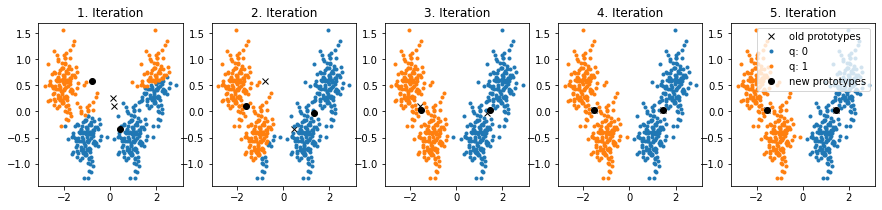

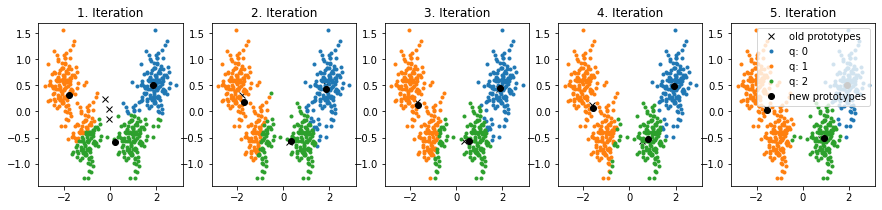

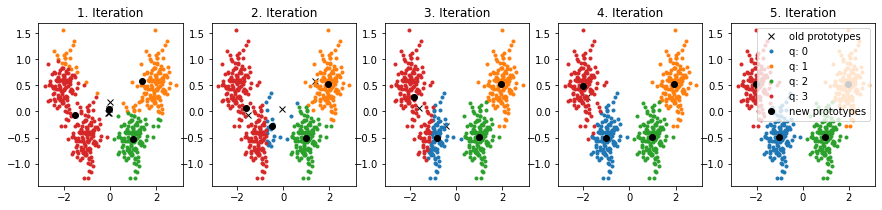

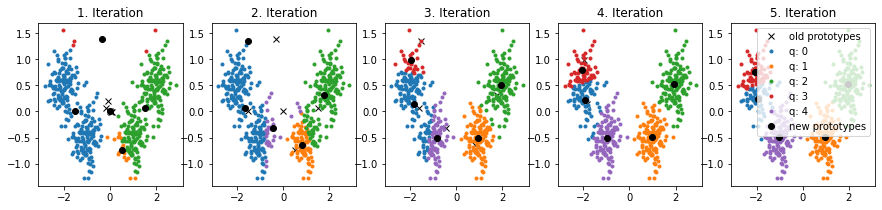

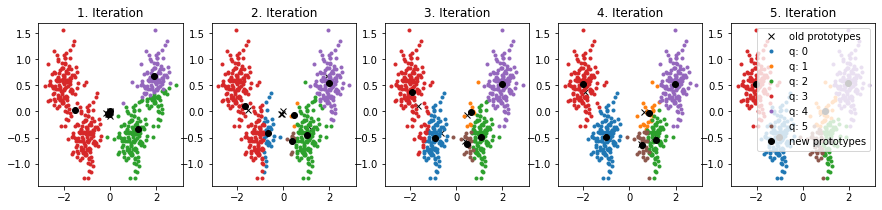

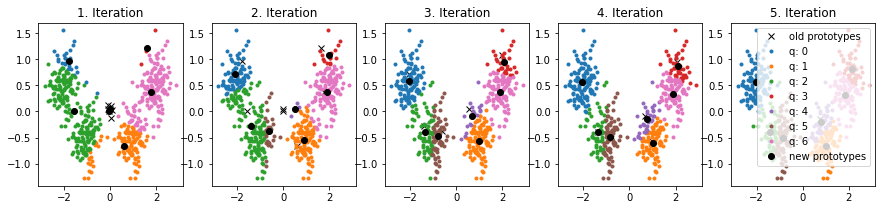

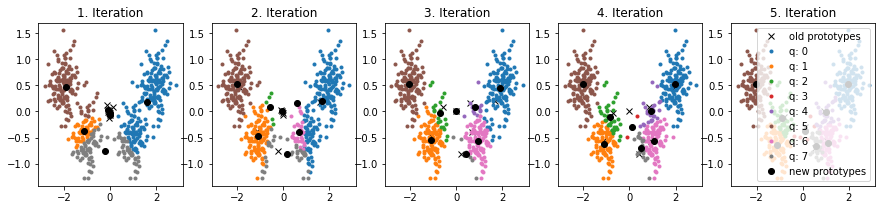

In [ ]:
# data: (2 x 500)
data = np.loadtxt('cluster.dat')

# M clusters
M = np.array([2, 3, 4, 5, 6, 7, 8])
t_max = 5
E1 = np.zeros((len(M),t_max))
E2 = np.zeros((len(M),t_max))

print('Initializations of the prototypes normal distribution with scale= 0.1. ')
# K-means clustering for M = 2; 3; 4; 5; 6; 7; 8
for i, M_i in enumerate(M):
    w, m, E1[i] = k_means_batch(M_i, data)



Initializations of the prototypes normal distribution with scale 1. 


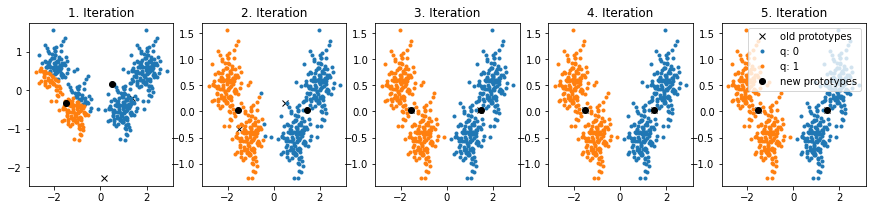

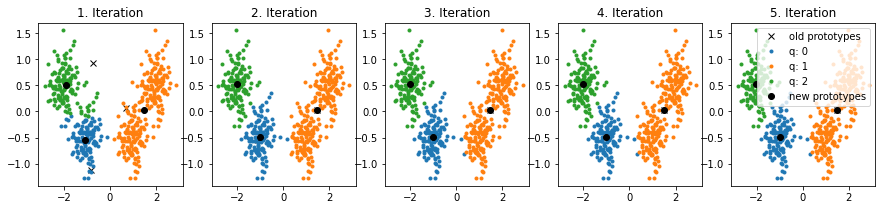

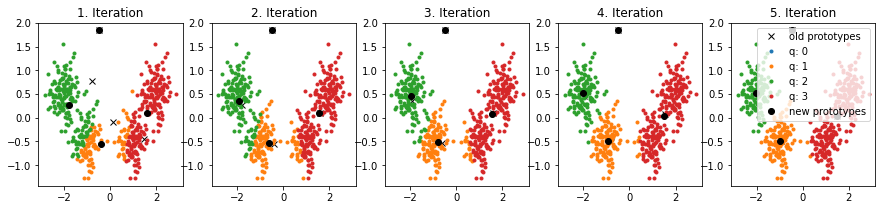

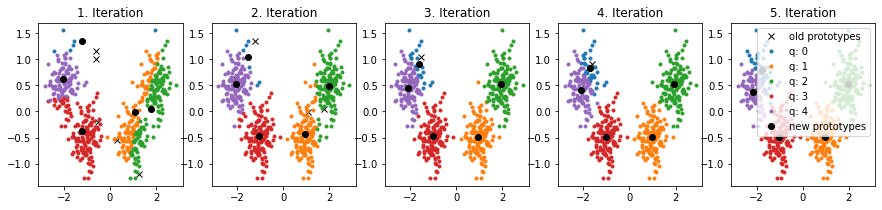

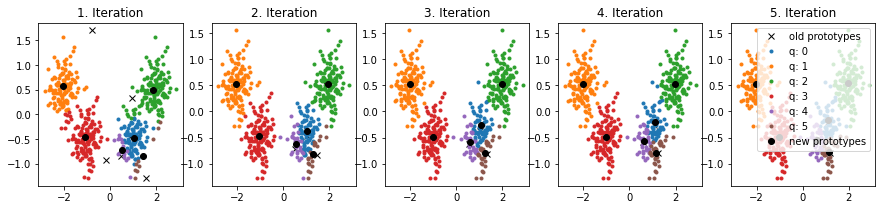

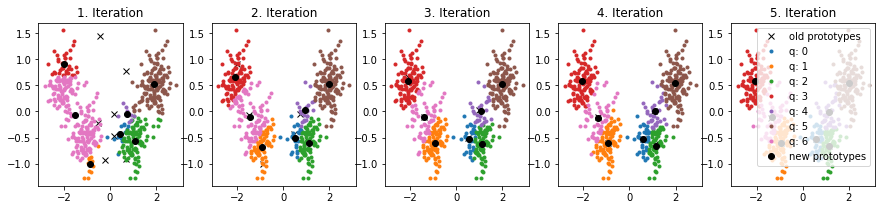

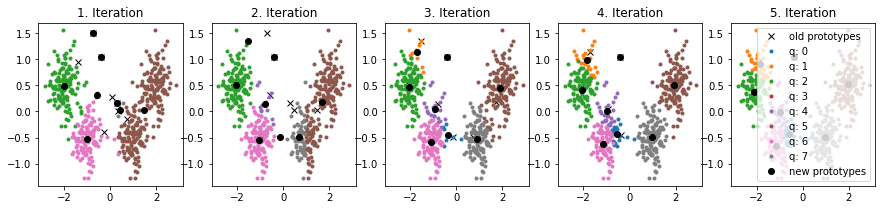

In [ ]:
print('Initializations of the prototypes normal distribution with scale 1. ')
scale = 1
for i, M_i in enumerate(M):
    w, m, E2[i] = k_means_batch(M_i, data, scale=scale)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,5], sharex=True, sharey=True)
for i, M_i in enumerate(M):
    ax1.plot(E1[i], label=f'M = {M_i}')
    ax2.plot(E2[i], label=f'M = {M_i}')

ax1.set_title('scale = 0.1')
ax2.set_title('scale = 1')
ax1.set_xlabel('iteration t')
ax2.set_xlabel('iteration t')
ax1.set_ylabel('error function E')
plt.legend(loc='upper right');

### c)

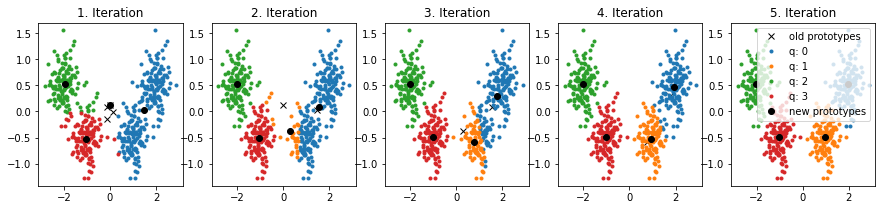

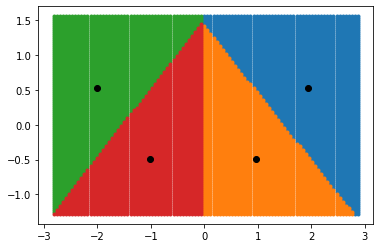

In [ ]:
# show decision bound for M=4
M = 4

# find optimal prototyps
w, m, _ = k_means_batch(M, data)

# create grid
x = np.linspace(min(data[0]), max(data[0]), 100)
y = np.linspace(min(data[1]), max(data[1]), 100)
xx, yy = np.meshgrid(x, y)
X = np.array([xx.flatten(), yy.flatten()])

n, p = X.shape

# assign every point of grid to closest prototype 
m_bounderies = np.zeros((p, M))
for a in range(p):
    clostest_q = np.argmin(np.linalg.norm(w - X[:, a], axis=1))
    m_bounderies[a, clostest_q] = 1

# plot the clusters
for q in range(M):
    plt.plot(X[0, m_bounderies[:, q]==1], X[1, m_bounderies[:, q]==1], '.', label=f'q= {q}')

# plot prototypes
plt.plot(w[:,0], w[:,1], 'o', color='black');



## Exercise H8.2: Online K-means Clustering

In [ ]:
def k_means_online(M, X):

    n, p = X.shape

    w_sequence = np.zeros((p, M, n))
    w_sequence[0] = np.random.normal(loc=np.mean(X, axis=1), scale=0.1, size=[M,n])

    # initial learning rate e0
    e = 0.6
    tau = 0.01

    t_max = p
    E = np.zeros(t_max)
    # m: p x M
    m = np.zeros((p, M))
    count = 0

    for t in range(0, t_max-1):
        if t > t_max/4:
            e *= tau 
            count += 1
                
        #q = np.argmin(np.linalg.norm(w - X[:, t], axis=1))
        closest_q = np.argmin(np.linalg.norm(X[:, t]-w_sequence[t], axis=1))
        
        m[t, closest_q] = 1

        w_sequence[t+1] = w_sequence[t]
        w_sequence[t+1, closest_q] +=  e *  (X[:, t] - w_sequence[t, closest_q])

        for q in range(M):
            x_q = X[:, m[:, q]==1]
            E[t+1] += np.sum(np.linalg.norm(x_q.T - w_sequence[t+1, q], axis=1))
        
        #E[t+1] = E[t] + np.linalg.norm(X[:, t] - w_sequence[t+1, q])
        

    return m, w_sequence, E/p

### a)

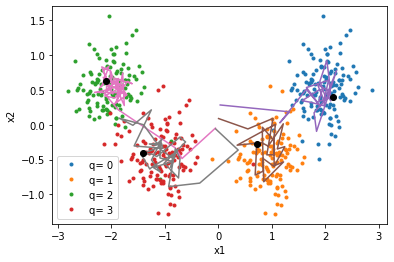

In [ ]:
M = 4
m_online, w_sequence, E = k_means_online(M, data)

for q in range(M):
    plt.plot(data[0, m_online[:, q]==1], data[1, m_online[:, q]==1], '.', label=f'q= {q}')

plt.plot(w_sequence[:,:,0], w_sequence[:,:,1])
plt.plot(w_sequence[-1,:,0], w_sequence[-1,:,1], 'o', color='black')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()


### b)

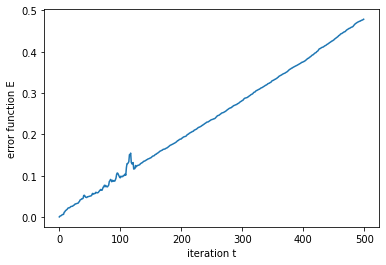

In [ ]:
plt.plot(E)
plt.xlabel('iteration t')
plt.ylabel('error function E');

E is increasing because with every iteration a new point is added and contributes to the error function. 

## Exercise H8.3: Soft K-means Clustering
### a)

In [ ]:
def soft_k_means_batch(M, X, w0, conv_tol, beta):
    
    n, p = X.shape

    # w: M x n
    w_old = np.copy(w0) - conv_tol
    w_new = np.copy(w0)
    # m: p x M (a, q)
    m = np.zeros((p, M))

    while np.any(abs(w_new - w_old) > conv_tol):
        #safe old w
        w_old = w_new
        
        # compute assigned probabilities:

        # loop over all p datapoints and assign all datapoints to their closest prototype.
        for a in range(p):
            for q in range(M):
                m[a, q] = np.exp(-(beta/2) * np.linalg.norm(X[:, a] - w_old[q]))
                m[a, q] /= np.sum(np.exp(-(beta/2) * np.linalg.norm(X[:,a] - w_old, axis=1)))

        # loop over all prototypes and recompute location 
        for q in range(M):
            w_new[q] = m[:,q] @ X.T / np.sum(m[:, q])
            
    return w_new, m

In [ ]:
M = 12
n, p = data.shape

beta = np.arange(0.2, 20, 0.2)

# w: M x n
w = np.random.normal(loc=np.mean(data, axis=1), scale=1, size=[M,n])
w_new = np.zeros((len(beta), M, n))
conv_tol = 0.001


### b)

In [ ]:
for i, b in enumerate(beta):
    w_new[i], m = soft_k_means_batch(M, data, w, conv_tol, beta=b)

### c)

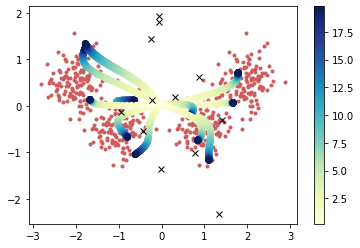

In [ ]:
plt.plot(data[0], data[1], '.', color='indianred', zorder=0)

for i in range(M):
    plt.scatter(w_new[:,i,0], w_new[:,i,1], c=beta, cmap='YlGnBu', label=f'beta: {b}', zorder=1)

plt.plot(w[:,0], w[:,1], 'x', label='old prototypes', color='black', zorder=2)


plt.colorbar()
plt.show()

### d)

In [ ]:
def soft_k_means_batch_annealing(M, X, w0, conv_tol, iterations, beta0=0.2, tau=1.1):
    """ set iterations = 0 to use criterion conv_tol in while loop,
        otherwise use for-loop with fixed number
    """
    
    n, p = X.shape

    # w: M x n
    w_old = np.copy(w0) - conv_tol
    w_new = np.copy(w0)
    # m: p x M (a, q)
    m = np.zeros((p, M))


    w2_vec = []

    beta = beta0


    if iterations == 0:
        while np.any(abs(w_new - w_old) > conv_tol):
            #safe old w
            w_old = w_new
            
            # compute assigned probabilities:

            # loop over all p datapoints and assign all datapoints to their closest prototype.
            for a in range(p):
                for q in range(M):
                    m[a, q] = np.exp(-(beta/2) * np.linalg.norm(X[:, a] - w_old[q]))
                    m[a, q] /= np.sum(np.exp(-(beta/2) * np.linalg.norm(X[:,a] - w_old, axis=1)))

            # loop over all prototypes and recompute location 
            for q in range(M):
                w_new[q] = m[:,q] @ X.T / np.sum(m[:, q])

            w2_vec.append(np.copy(w_new[:,1]))  # keep track of temporal evolution

            beta = tau*beta
            
    else:
        
        for c in range(30):
            #safe old w
            w_old = w_new
            
            # compute assigned probabilities:

            # loop over all p datapoints and assign all datapoints to their closest prototype.
            for a in range(p):
                for q in range(M):
                    m[a, q] = np.exp(-(beta/2) * np.linalg.norm(X[:, a] - w_old[q]))
                    m[a, q] /= np.sum(np.exp(-(beta/2) * np.linalg.norm(X[:,a] - w_old, axis=1)))

            # loop over all prototypes and recompute location 
            for q in range(M):
                w_new[q] = m[:,q] @ X.T / np.sum(m[:, q])

            w2_vec.append(np.copy(w_new[:,1]))  # keep track of temporal evolution

            beta = tau*beta
 
    return w_new, m, w2_vec

In [ ]:
M = 12
n, p = data.shape

# w: M x n
w0 = np.random.normal(loc=np.mean(data, axis=1), scale=1, size=[M,n])
conv_tol = 0.001


w_new, m, w2_vec = soft_k_means_batch_annealing(M, data, w0, conv_tol, iterations=40, tau=1.2)


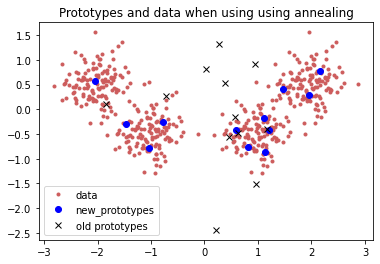

In [ ]:
plt.plot(data[0], data[1], '.', label='data', color='indianred', zorder=0)

plt.plot(w_new[:,0], w_new[:,1], 'bo', label='new_prototypes', zorder=1)

plt.plot(w0[:,0], w0[:,1], 'x', label='old prototypes', color='black', zorder=2)
plt.legend()
plt.title('Prototypes and data when using using annealing');

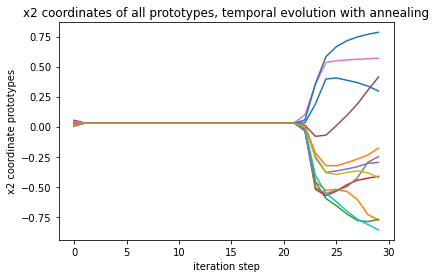

In [ ]:
plt.plot(np.array(w2_vec))
plt.xlabel('iteration step')
plt.ylabel('x2 coordinate prototypes')
plt.title('x2 coordinates of all prototypes, temporal evolution with annealing');

Somehow we had problems when we tried to apply a while-loop with distance criterion as in the previous exercise where no annealing was applied. Thus we allow an alternative where the annealing soft clustering is computed for a fixed number of iterations.

In our plot for the temporal evolution of the prototypes we can observe that after an initial rapid decrease all the prototypes are located very close to zero (this is when the while-loop would get interrupted). We even tried extremly small difference-criteria (such as 1e-20), but the brhaviour did not change.
Only a couple of iterations later we get out of this, what could be some minimum. The fact that the prototypes start moving significantly again can be explained by the annealing-process. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b99e2596-0367-4d67-802d-398a8bebc31e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>